# SVM BP MLR

SVM Cross-Validation Accuracy for Separable Ring Dataset: 52.03% (+/- 0.05%)
SVM Cross-Validation Accuracy for Merged Ring Dataset: 55.15% (+/- 0.00%)
BP Cross-Validation Accuracy for Separable Ring Dataset: 96.40% (+/- 0.52%)
MLR Cross-Validation Accuracy for Separable Ring Dataset: 49.37% (+/- 4.49%)

SVM Accuracy for Separable Ring Dataset (Test): 53.33%
SVM Accuracy for Merged Ring Dataset (Test): 53.33%

BP Accuracy for Separable Ring Dataset (Test): 96.49%

MLR Accuracy for Separable Ring Dataset (Test): 52.89%

Confusion Matrix for BP:
[[5017  316]
 [  35 4632]]


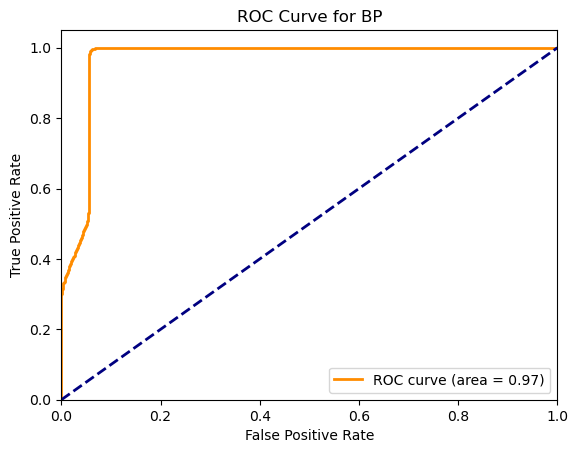


Confusion Matrix for MLR:
[[5289   44]
 [4667    0]]

Classification Report for SVM on Test Set (Separable Ring Dataset):
              precision    recall  f1-score   support

           0       0.53      1.00      0.70      5333
           1       0.00      0.00      0.00      4667

    accuracy                           0.53     10000
   macro avg       0.27      0.50      0.35     10000
weighted avg       0.28      0.53      0.37     10000


Classification Report for BP on Test Set (Separable Ring Dataset):
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      5333
           1       0.94      0.99      0.96      4667

    accuracy                           0.96     10000
   macro avg       0.96      0.97      0.96     10000
weighted avg       0.97      0.96      0.96     10000


Classification Report for MLR on Test Set (Separable Ring Dataset):
              precision    recall  f1-score   support

           0       0.53      0.

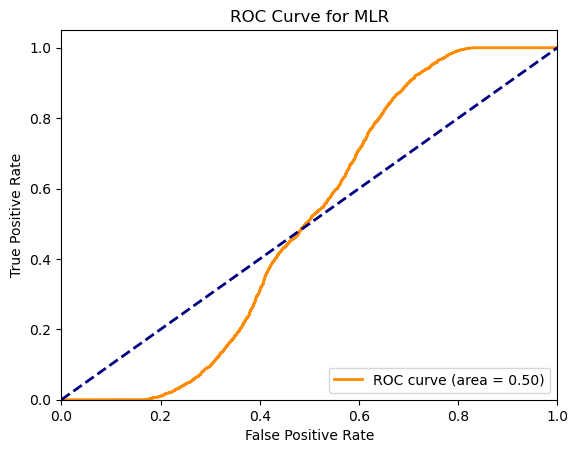

In [3]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.exceptions import UndefinedMetricWarning

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
# Load data for the Ring dataset
ring_separable = pd.read_csv('A2-ring-separable.txt', sep='\t', header=None, names=['Feature1', 'Feature2', 'Class'])
ring_merged = pd.read_csv('A2-ring-merged.txt', sep='\t', header=None, names=['Feature1', 'Feature2', 'Class'])
ring_test = pd.read_csv('A2-ring-test.txt', sep='\t', header=None, names=['Feature1', 'Feature2', 'Class'])

X_separable = ring_separable[['Feature1', 'Feature2']]
y_separable = ring_separable['Class']

X_merged = ring_merged[['Feature1', 'Feature2']]
y_merged = ring_merged['Class']

X_test = ring_test[['Feature1', 'Feature2']]
y_test = ring_test['Class']

# Standardize features across datasets
scaler = StandardScaler()
X_separable_scaled = scaler.fit_transform(X_separable)
X_merged_scaled = scaler.transform(X_merged)
X_test_scaled = scaler.transform(X_test)

# SVM with cross-validation
svm_separable = SVC(kernel='linear')
svm_scores_separable = cross_val_score(svm_separable, X_separable_scaled, y_separable, cv=5)
print("SVM Cross-Validation Accuracy for Separable Ring Dataset: {:.2f}% (+/- {:.2f}%)".format(
    svm_scores_separable.mean() * 100, svm_scores_separable.std() * 200))

svm_merged = SVC(kernel='linear')
svm_scores_merged = cross_val_score(svm_merged, X_merged_scaled, y_merged, cv=5)
print("SVM Cross-Validation Accuracy for Merged Ring Dataset: {:.2f}% (+/- {:.2f}%)".format(
    svm_scores_merged.mean() * 100, svm_scores_merged.std() * 200))

# BP with cross-validation
bp_model = MLPClassifier(max_iter=1000)
bp_scores_separable = cross_val_score(bp_model, X_separable_scaled, y_separable, cv=5)
print("BP Cross-Validation Accuracy for Separable Ring Dataset: {:.2f}% (+/- {:.2f}%)".format(
    bp_scores_separable.mean() * 100, bp_scores_separable.std() * 200))

# MLR with cross-validation
mlr_model = LogisticRegression()
mlr_scores_separable = cross_val_score(mlr_model, X_separable_scaled, y_separable, cv=5)
print("MLR Cross-Validation Accuracy for Separable Ring Dataset: {:.2f}% (+/- {:.2f}%)".format(
    mlr_scores_separable.mean() * 100, mlr_scores_separable.std() * 200))

# Train the SVM classifiers on the full training set
svm_separable.fit(X_separable_scaled, y_separable)
svm_merged.fit(X_merged_scaled, y_merged)

# Predict on the test set
y_pred_test_separable_svm = svm_separable.predict(X_test_scaled)
y_pred_test_merged_svm = svm_merged.predict(X_test_scaled)

# Evaluate accuracy on the test set
accuracy_test_separable_svm = accuracy_score(y_test, y_pred_test_separable_svm)
accuracy_test_merged_svm = accuracy_score(y_test, y_pred_test_merged_svm)

# Print results for SVM on the test set
print("\nSVM Accuracy for Separable Ring Dataset (Test): {:.2f}%".format(accuracy_test_separable_svm * 100))
print("SVM Accuracy for Merged Ring Dataset (Test): {:.2f}%".format(accuracy_test_merged_svm * 100))

# BP with full training set
bp_model.fit(X_separable_scaled, y_separable)

# Predict on the test set
y_pred_test_separable_bp = bp_model.predict(X_test_scaled)

# Evaluate accuracy on the test set
accuracy_test_separable_bp = accuracy_score(y_test, y_pred_test_separable_bp)

# Print results for BP on the test set
print("\nBP Accuracy for Separable Ring Dataset (Test): {:.2f}%".format(accuracy_test_separable_bp * 100))

# MLR with full training set
mlr_model.fit(X_separable_scaled, y_separable)

# Predict on the test set
y_pred_test_separable_mlr = mlr_model.predict(X_test_scaled)

# Evaluate accuracy on the test set
accuracy_test_separable_mlr = accuracy_score(y_test, y_pred_test_separable_mlr)

# Print results for MLR on the test set
print("\nMLR Accuracy for Separable Ring Dataset (Test): {:.2f}%".format(accuracy_test_separable_mlr * 100))

# Evaluate BP on the test set
y_pred_test_separable_bp = bp_model.predict(X_test_scaled)

# Confusion matrix for BP
cm_bp = confusion_matrix(y_test, y_pred_test_separable_bp)
print("\nConfusion Matrix for BP:")
print(cm_bp)

# ROC Curve for BP
fpr_bp, tpr_bp, thresholds_bp = roc_curve(y_test, bp_model.predict_proba(X_test_scaled)[:, 1])
roc_auc_bp = auc(fpr_bp, tpr_bp)

plt.figure()
plt.plot(fpr_bp, tpr_bp, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_bp)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for BP')
plt.legend(loc="lower right")
plt.show()

# Evaluate MLR on the test set
y_pred_test_separable_mlr = mlr_model.predict(X_test_scaled)

# Confusion matrix for MLR
cm_mlr = confusion_matrix(y_test, y_pred_test_separable_mlr)
print("\nConfusion Matrix for MLR:")
print(cm_mlr)

# Classification Report for SVM
print("\nClassification Report for SVM on Test Set (Separable Ring Dataset):")
print(classification_report(y_test, y_pred_test_separable_svm))

# Classification Report for BP
print("\nClassification Report for BP on Test Set (Separable Ring Dataset):")
print(classification_report(y_test, y_pred_test_separable_bp))

# Classification Report for MLR
print("\nClassification Report for MLR on Test Set (Separable Ring Dataset):")
print(classification_report(y_test, y_pred_test_separable_mlr))

# ROC Curve for MLR
fpr_mlr, tpr_mlr, thresholds_mlr = roc_curve(y_test, mlr_model.predict_proba(X_test_scaled)[:, 1])
roc_auc_mlr = auc(fpr_mlr, tpr_mlr)

plt.figure()
plt.plot(fpr_mlr, tpr_mlr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_mlr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for MLR')
plt.legend(loc="lower right")
plt.show()


# Best parameter,  classification error, confusion matrix

In [4]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data for the Ring dataset
ring_separable = pd.read_csv('A2-ring-separable.txt', sep='\t', header=None, names=['Feature1', 'Feature2', 'Class'])
ring_test = pd.read_csv('A2-ring-test.txt', sep='\t', header=None, names=['Feature1', 'Feature2', 'Class'])

X_separable = ring_separable[['Feature1', 'Feature2']]
y_separable = ring_separable['Class']

X_test = ring_test[['Feature1', 'Feature2']]
y_test = ring_test['Class']

# Standardize features
scaler = StandardScaler()
X_separable_scaled = scaler.fit_transform(X_separable)
X_test_scaled = scaler.transform(X_test)

# SVM with cross-validation
svm_model = SVC()
param_grid_svm = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
}

grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5)
grid_search_svm.fit(X_separable_scaled, y_separable)

# Best parameters found by the grid search for SVM
best_params_svm = grid_search_svm.best_params_

# Cross-validation predictions for SVM
cv_predictions_svm = cross_val_predict(grid_search_svm, X_separable_scaled, y_separable, cv=5)

# Classification error for SVM
classification_error_svm = 1 - accuracy_score(y_separable, cv_predictions_svm)

# Confusion matrix for SVM
conf_matrix_svm = confusion_matrix(y_separable, cv_predictions_svm)

# Output results for SVM
print("SVM Results:")
print("Cross-validation Best Parameters:", best_params_svm)
print("Classification Error: {:.2f}%".format(classification_error_svm * 100))
print("Confusion Matrix:\n", conf_matrix_svm)


SVM Results:
Cross-validation Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Classification Error: 0.56%
Confusion Matrix:
 [[5162   41]
 [  15 4782]]


In [2]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load data for the Ring dataset
ring_separable = pd.read_csv('A2-ring-separable.txt', sep='\t', header=None, names=['Feature1', 'Feature2', 'Class'])

X_separable = ring_separable[['Feature1', 'Feature2']]
y_separable = ring_separable['Class']

# Standardize features
scaler = StandardScaler()
X_separable_scaled = scaler.fit_transform(X_separable)

# Logistic Regression with cross-validation
logistic_model = LogisticRegression()
param_grid_logistic = {
    'C': [0.1, 1, 10],  # Regularization parameter
}

grid_search_logistic = GridSearchCV(logistic_model, param_grid_logistic, cv=5)
grid_search_logistic.fit(X_separable_scaled, y_separable)

# Best parameters found by the grid search for Logistic Regression
best_params_logistic = grid_search_logistic.best_params_

# Cross-validation predictions for Logistic Regression
cv_predictions_logistic = cross_val_predict(grid_search_logistic, X_separable_scaled, y_separable, cv=5)

# Classification error for Logistic Regression
classification_error_logistic = 1 - accuracy_score(y_separable, cv_predictions_logistic)

# Confusion matrix for Logistic Regression
conf_matrix_logistic = confusion_matrix(y_separable, cv_predictions_logistic)


# Output results for Logistic Regression
print("\n BP Results:")
print("Cross-validation Best Parameters for Logistic Regression:", best_params_logistic)
print("Classification Error for Logistic Regression: {:.2f}%".format(classification_error_logistic * 100))
print("Confusion Matrix for Logistic Regression:\n", conf_matrix_logistic)



 BP Results:
Cross-validation Best Parameters for Logistic Regression: {'C': 0.1}
Classification Error for Logistic Regression: 50.58%
Confusion Matrix for Logistic Regression:
 [[4942  261]
 [4797    0]]


In [1]:
import pandas as pd
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load data for the Ring dataset
ring_separable = pd.read_csv('A2-ring-separable.txt', sep='\t', header=None, names=['Feature1', 'Feature2', 'Class'])

X_separable = ring_separable[['Feature1', 'Feature2']]
y_separable = ring_separable['Class']

# Standardize features
scaler = StandardScaler()
X_separable_scaled = scaler.fit_transform(X_separable)

# Multiple Linear Regression with cross-validation
mlr_model = LinearRegression()
mlr_model.fit(X_separable_scaled, y_separable)

# Cross-validation predictions for Multiple Linear Regression
cv_predictions_mlr = cross_val_predict(mlr_model, X_separable_scaled, y_separable, cv=5)

# Calculate metrics for Multiple Linear Regression
mse_mlr = mean_squared_error(y_separable, cv_predictions_mlr)
r2_mlr = r2_score(y_separable, cv_predictions_mlr)

# Output results for Multiple Linear Regression
print("\n MLR Results:")
print("Mean Squared Error for MLR: {:.2f}".format(mse_mlr))
print("R-squared for MLR: {:.2f}".format(r2_mlr))



 MLR Results:
Mean Squared Error for MLR: 0.25
R-squared for MLR: -0.00
